In [13]:
%pip install nltk

^C


In [14]:
import nltk

In [15]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords 
from nltk import ngrams
from nltk import word_tokenize
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from nltk.stem import PorterStemmer
from sklearn import metrics

In [17]:
df = pd.read_csv("E:/Anaconda/ISEAR.csv", header=None)
df.head()

,0,1,2
0,joy,On days when I feel close to my partner and ot...,NaN
1,fear,Every time I imagine that someone I love or I ...,NaN
2,anger,When I had been obviously unjustly treated and...,NaN
3,sadness,When I think about the short time that we live...,NaN
4,disgust,At a gathering I found myself involuntarily si...,NaN


In [18]:
col = [0,1]
new_df = df[col]
new_df = new_df[pd.notnull(df[1])]
new_df.columns = ['Emotion', 'Text']
new_df.head()

,Emotion,Text
0,joy,On days when I feel close to my partner and ot...
1,fear,Every time I imagine that someone I love or I ...
2,anger,When I had been obviously unjustly treated and...
3,sadness,When I think about the short time that we live...
4,disgust,At a gathering I found myself involuntarily si...


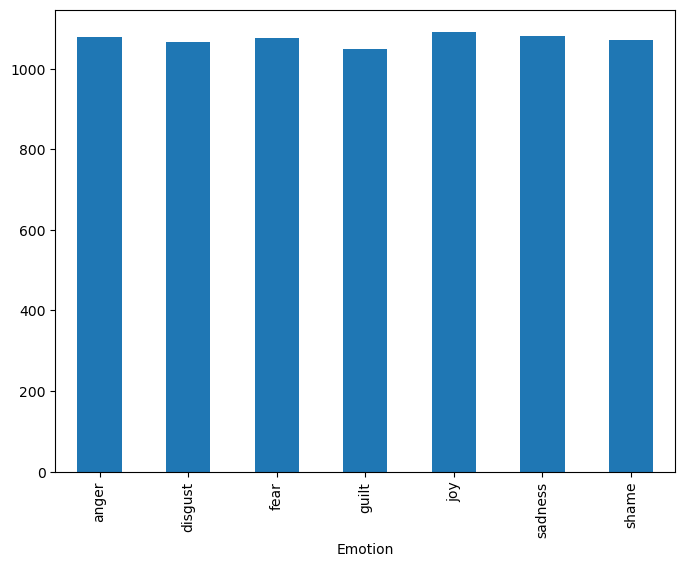

In [19]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
new_df.groupby('Emotion').Text.count().plot.bar(ylim=0)
plt.show()

In [20]:
new_df['Text']
new_df['Emotion']
def getTokenizedList(input_df):
    tokenizedList = []
    for i in range (0, len(input_df)):
        curText = input_df[1].iloc[i]
        curText = curText.replace('  \n', '')
        curTokenized = word_tokenize(curText)
        tokenizedList.append(curTokenized)
        #print(tokenizedlist)
        tokenizedListWithoutPunct = [] 
        punctList=list(string.punctuation)
        for i in range(0,len(tokenizedList)):
            curList = tokenizedList[i]
            newList = [] #List without stopwords
            for word in curList:
                if (word.lower() not in punctList):
                    newList.append(word.lower())
            tokenizedListWithoutPunct.append(newList)

    #print(tokenizedListWithoutPunct)
#Stemming
    mystemmer = PorterStemmer()
    tokenizedStemmed = []
    for i in range (0, len(tokenizedListWithoutPunct)):
        curList = tokenizedListWithoutPunct[i]
        newList = []
        for word in curList:
            newList.append(mystemmer.stem(word))
        tokenizedStemmed.append(newList)
    return tokenizedStemmed

In [21]:
def transformSentence(sent):
    s = []
    sent = sent.replace(' \n', '')
    sentTokenized = word_tokenize(sent)
    s.append(sentTokenized)
    sWithoutPunct = []
    punctList =list (string.punctuation)
    curSentList = s[0]
    newSentList = []
    for word in curSentList:
        if (word.lower() not in punctList):
            newSentList.append(word.lower())
    sWithoutPunct.append(newSentList)
    mystemmer = PorterStemmer()
    tokenizedStemmed = []
    for i in range (0, len(sWithoutPunct)):
        curList = sWithoutPunct[i]
        newList = []
        for word in curList:
            newList.append(mystemmer.stem(word))
            tokenizedStemmed.append(newList)
    return tokenizedStemmed
    

In [22]:
new_df['Text'] = getTokenizedList(df)
#new_df['Text']

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(new_df['Text'], new_df['Emotion'], test_size =.3, random_state = 1)

In [24]:
#Function to pass the list to the Tfidf vectorizer
def returnPhrase (inputList):
    return inputList

In [36]:
#Extracting features for Naive Bayes
myVectorizer=TfidfVectorizer(analyzer ='word',tokenizer=returnPhrase,preprocessor=returnPhrase,token_pattern=None,ngram_range = (1,3))
myVectorizer.fit(X_train)
transformedTrain=myVectorizer.transform(X_train).toarray()
transformedTest=myVectorizer.transform(X_test).toarray()

In [37]:
curAlpha=0.33 #smoothing factor in NB
NBClassifier=MultinomialNB(alpha=curAlpha)
NBClassifier.fit(transformedTrain,Y_train)
myPredTest=NBClassifier.predict(transformedTest)
print('Best Acc Naive Bayes')
#print(curAlpha)
print(np.sum(myPredTest==Y_test)/len(Y_test))

Best Acc Naive Bayes
0.5658536585365853


In [38]:
print('Metrics Classification Report : Naive Bayes')
print(metrics.classification_report(Y_test, myPredTest))

Metrics Classification Report : Naive Bayes
              precision    recall  f1-score   support

       anger       0.49      0.43      0.46       331
     disgust       0.71      0.50      0.59       324
        fear       0.61      0.70      0.65       311
       guilt       0.41      0.57      0.48       299
         joy       0.66      0.70      0.68       323
     sadness       0.65      0.60      0.63       351
       shame       0.48      0.47      0.48       316

    accuracy                           0.57      2255
   macro avg       0.57      0.57      0.57      2255
weighted avg       0.58      0.57      0.57      2255



In [39]:
myVectorizer=TfidfVectorizer(analyzer='word',tokenizer=returnPhrase,preprocessor=returnPhrase,token_pattern=None,ngram_range=(1,3))
myVectorizer.fit(X_train)
transformedTrain=myVectorizer.transform(X_train).toarray()
transformedTest=myVectorizer.transform(X_test).toarray()

In [40]:
curC=2 #cost factor in SVM
SVMClassifier=svm.LinearSVC(C=curC)
SVMClassifier.fit(transformedTrain, Y_train)
myPredTest=SVMClassifier.predict(transformedTest)
print('Best Acc SVM')
#print curC
print(np.sum(myPredTest==Y_test)/len(Y_test))

e:\Anaconda\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Best Acc SVM
0.5929046563192905


In [41]:
print('Metrics Classification Report : SVM')
print(metrics.classification_report(Y_test,myPredTest))

Metrics Classification Report : SVM
              precision    recall  f1-score   support

       anger       0.49      0.50      0.49       331
     disgust       0.65      0.58      0.61       324
        fear       0.65      0.69      0.67       311
       guilt       0.49      0.55      0.52       299
         joy       0.68      0.72      0.70       323
     sadness       0.65      0.64      0.64       351
       shame       0.53      0.48      0.50       316

    accuracy                           0.59      2255
   macro avg       0.59      0.59      0.59      2255
weighted avg       0.59      0.59      0.59      2255



In [43]:
#To predict the emotion of a sentence using Naive Bayes
def predictSentNB(sent):
    sentPred = NBClassifier.predict(myVectorizer.transform(transformSentence(sent)).toarray())
    return sentPred

In [44]:
#To predict the emotion of a sentence using SVM
def predictSentSVM(sent):
    sentPred = SVMClassifier.predict(myVectorizer.transform(transformSentence(sent)).toarray())
    return sentPred

In [45]:
sent = 'I love you to the moon and back'
#printing the predicted emotion
print('Naive Bayes Prediction')
print(predictSentNB(sent))
print('SVM Prediction')
print(predictSentSVM(sent))


Naive Bayes Prediction
['joy' 'joy' 'joy' 'joy' 'joy' 'joy' 'joy' 'joy']
SVM Prediction
['joy' 'joy' 'joy' 'joy' 'joy' 'joy' 'joy' 'joy']


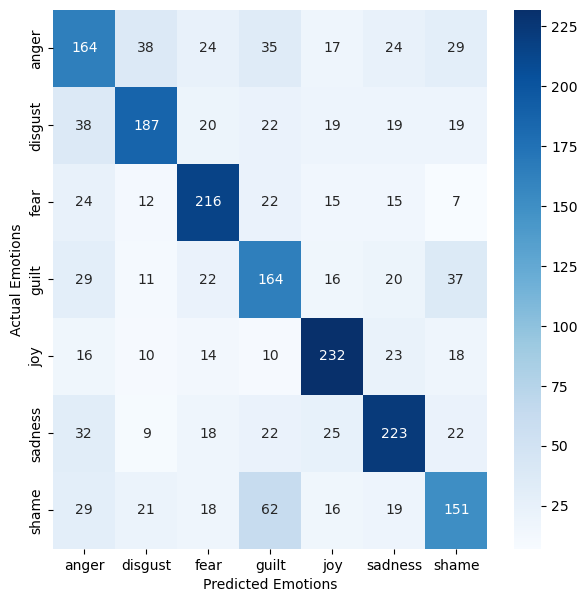

In [53]:
#printing the confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

labels = ['anger', 'disgust', 'fear', 'guilt', 'joy', 'sadness', 'shame']
cm = confusion_matrix(Y_test, myPredTest, labels=labels)  # Perbaikan pada argumen labels
#print(cm)

fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.ylabel('Actual Emotions')
plt.xlabel('Predicted Emotions')
plt.show()
